In [1]:
import os
import h5py
import cv2

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as patches

%matplotlib inline

In [2]:
def load(dbname, dataset):
    '''
    dbname is the path to the database hdf file, dataset is the dataset name.
    returns a pandas dataframe and a dictionary with meta data for the dataset.
    '''
    attrs = None
    with h5py.File(dbname) as f:
        if dataset not in f.keys():
            raise ValueError('Can\'t find dataset. Available keys are: ' + str(f.keys()))
        try:
            df = pd.DataFrame(dict((k, f[dataset][k][:].ravel()) for k in f[dataset].keys()))
        except ValueError:
            raise RuntimeError('Not all fields have the same length:' +
                str(dict((k, f[dataset][k][:].ravel().shape) for k in f[dataset].keys())))
        if len(f[dataset].attrs.keys())>0:
            attrs = dict((k, f[dataset].attrs[k]) for k in  f[dataset].attrs.keys())
    return df, attrs

In [3]:
os.chdir('/Users/hyunwoogu/Dropbox/2018Autumn/GradThesis/EyeTracking_data/')

In [4]:
Data, attrs = load("etdb_v1.0.hdf5", "Face Discrim.")

In [115]:
Counts = [1]
j = 1

for i in np.arange(1, Data.shape[0]) :
    if all(Data.iloc[i-1, [0, 11]] == Data.iloc[i, [0, 11]]) : j += 1
    else : j = 1
    Counts.append(j)

Data['counts'] = Counts

In [123]:
Data.columns.values

array(['SUBJECTINDEX', 'category', 'chain', 'condition', 'dataset_nr',
       'end', 'filenumber', 'fix', 'isref', 'phase', 'start', 'trial', 'x',
       'y', 'counts'], dtype=object)

In [124]:
Data.counts.value_counts()

1     23144
2     22775
3     21262
4     17378
5     10728
6      4036
7       930
8       147
9        36
10        7
11        2
14        1
13        1
12        1
Name: counts, dtype: int64

In [68]:
Order = Data[Data['filenumber']==Num]

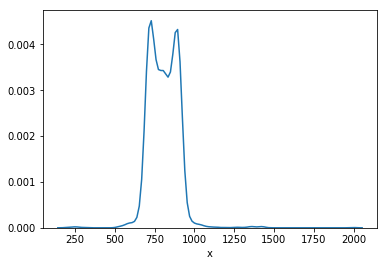

In [69]:
sns.distplot(Subject['x'], hist=False)
plt.show()

In [70]:
adr = '21/' + str(Num) + '.png'
img = cv2.imread(adr, 1)
img = cv2.resize(img, (1600, 1200), interpolation=cv2.INTER_CUBIC)

In [8]:
def transparent_cmap(cmap, N=255):
    mycmap = cmap
    mycmap._init()
    mycmap._lut[:,-1] = np.linspace(0, 0.8, N+4)
    return mycmap

mycmap = transparent_cmap(plt.cm.Reds)

In [79]:
plt.imshow(img)
plt.xlim(0, 1600)
plt.ylim(1200, 0)

ax = sns.kdeplot(FileNum['x'], FileNum['y'], shade = True, cmap = mycmap)
ax.patch.set_facecolor('white')
ax.collections[0].set_alpha(0)

plt.show()

IndentationError: expected an indented block (<ipython-input-79-c4575e219621>, line 5)

#### Gaze map by different faces

pictures used : (21, 5, 1, 17, 29, 13) based on the frequency.

Pic|Freq
-|-
21|    10660
5|     10289
1|     10215
17|    10146
29|     9292
13|     9065

In [ ]:
fig = plt.figure()

for i, Num in enumerate((21, 5, 1, 17, 29, 13)):
    
    FileNum = Data[Data['filenumber']==Num]
    adr = '21/' + str(Num) + '.png'
    img = cv2.imread(adr, 1)
    img = cv2.resize(img, (1600, 1200), interpolation=cv2.INTER_CUBIC)
    
    fig_num = "23" + str(i+1)
    fig.add_subplot(int(fig_num))

    plt.imshow(img)
    plt.xlim(0, 1600)
    plt.ylim(1200, 0)
    plt.axis('off')

    ax = sns.kdeplot(FileNum['x'], FileNum['y'], shade = True, cmap = mycmap)
    ax.patch.set_facecolor('white')
    ax.collections[0].set_alpha(0)

plt.show()

#### Gaze map by fixation area

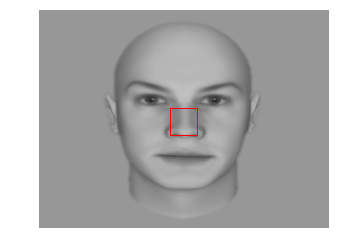

In [14]:
coord = (520, 390) ## x coord (from left), y coord (from top) 
coord = (720, 540)

fig, ax = plt.subplots(1)

plt.imshow(img)
plt.xlim(0, 1600)
plt.ylim(1200, 0)
plt.axis('off')

rect = patches.Rectangle(coord,150,150,linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
plt.show()

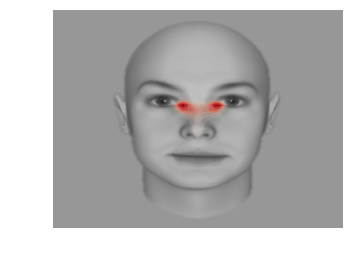

In [12]:
fig = plt.figure()

Num = 1
FileNum = Data[Data['filenumber']==Num]
adr = '21/' + str(Num) + '.png'
img = cv2.imread(adr, 1)
img = cv2.resize(img, (1600, 1200), interpolation=cv2.INTER_CUBIC)

plt.imshow(img)
plt.xlim(0, 1600)
plt.ylim(1200, 0)
plt.axis('off')

ax = sns.kdeplot(FileNum['x'], FileNum['y'], shade = True, cmap = mycmap)
ax.patch.set_facecolor('white')
ax.collections[0].set_alpha(0)

plt.show()

In [10]:
Num = 15
adr = '21/' + str(Num) + '.png'
img = cv2.imread(adr, 1)
img = cv2.resize(img, (1600, 1200), interpolation=cv2.INTER_CUBIC)

In [ ]:
from PIL import Image

im = np.array(Image.open('stinkbug.png'), dtype=np.uint8)

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im)

# Create a Rectangle patch
rect = patches.Rectangle((50,100),40,30,linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

#### Gaze map by fixation order

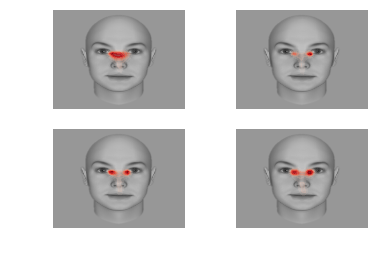

In [125]:
fig = plt.figure()

for i, Order in enumerate((1, 3, 5, 7)):
    
    GazeOrder = Data[Data['counts']==Order]
    adr = '21/1.png'
    img = cv2.imread(adr, 1)
    img = cv2.resize(img, (1600, 1200), interpolation=cv2.INTER_CUBIC)
    
    fig_num = "22" + str(i+1)
    fig.add_subplot(int(fig_num))

    plt.imshow(img)
    plt.xlim(0, 1600)
    plt.ylim(1200, 0)
    plt.axis('off')

    ax = sns.kdeplot(GazeOrder['x'], GazeOrder['y'], shade = True, cmap = mycmap)
    ax.patch.set_facecolor('white')
    ax.collections[0].set_alpha(0)

plt.show()